<a href="https://colab.research.google.com/github/KarysSantiago/AI-Clase/blob/main/examne_prueba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, accuracy_score

from sklearn.metrics import classification_report, make_scorer
from imblearn.metrics import geometric_mean_score, classification_report_imbalanced
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold

In [13]:
df = pd.read_csv('/content/drive/MyDrive/Curso IA/german_credit.csv')
display(df)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,3-Feb,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,3-Feb,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,3-Feb,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


In [7]:
print(df['credit_risk'].value_counts())

credit_risk
0    700
1    300
Name: count, dtype: int64


In [11]:
print(df.isnull().sum())

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64


In [16]:
df['credit_risk'] = df['credit_risk'].map({'good': 0, 'bad': 1}) #Pasar a numero

In [14]:
print(df.dtypes)

status                     object
duration                    int64
credit_history             object
purpose                    object
amount                      int64
savings                    object
employment_duration        object
installment_rate           object
personal_status_sex        object
other_debtors              object
present_residence          object
property                   object
age                         int64
other_installment_plans    object
housing                    object
number_credits             object
job                        object
people_liable              object
telephone                  object
foreign_worker             object
credit_risk                object
dtype: object


In [17]:
print(df.describe())

          duration       amount         age  credit_risk
count  1000.000000   1000.00000  1000.00000  1000.000000
mean     20.903000   3271.24800    35.54200     0.300000
std      12.058814   2822.75176    11.35267     0.458487
min       4.000000    250.00000    19.00000     0.000000
25%      12.000000   1365.50000    27.00000     0.000000
50%      18.000000   2319.50000    33.00000     0.000000
75%      24.000000   3972.25000    42.00000     1.000000
max      72.000000  18424.00000    75.00000     1.000000


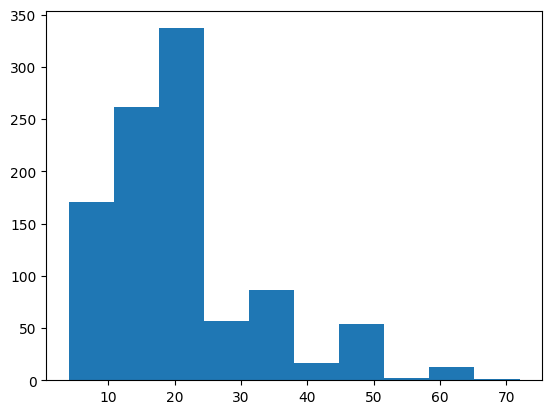

In [20]:
plt.hist(df['duration'])
plt.show()

In [8]:
X = df.drop(columns='credit_risk')
y = df['credit_risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

#Pipeline

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import make_pipeline

In [33]:
numeric_pipeline = Pipeline([
    ('scaler', MinMaxScaler())
])

categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

binary_pipeline = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary'))
])
categorical_vars = X.columns[X.dtypes == 'object'].tolist()

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, ['duration','amount','age']),
    ('cat', categorical_pipeline, categorical_vars)
])

In [32]:
def mi_accuracy(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return (tp + tn) / (tp + tn + fp + fn)
def mi_precision(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tp / (tp + fp)
def mi_recall(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tp / (tp + fn)
def mi_f1(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    precision = mi_precision(y_true, y_pred)
    recall = mi_recall(y_true, y_pred)
    return 2 * (precision * recall) / (precision + recall)
def mi_gmean(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    recall = mi_recall(y_true, y_pred)
    return np.sqrt(recall * (tn / (tn + fp)))



In [31]:
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

In [37]:
train_results = []
val_results = []
recall_scores = []


In [39]:
model = LogisticRegression(class_weight='balanced', max_iter=1000)
pipe = make_pipeline(preprocessor, model)

mismetricas = {
      'accuracy':make_scorer(mi_accuracy),
      'recall': make_scorer(mi_recall),
      'gmean': make_scorer(mi_gmean),
      'precision': make_scorer(mi_precision),
      'f1': make_scorer(mi_f1)
  }

resultadosOU = cross_validate(pipe, X, y, cv=kfold, scoring=mismetricas)

fit_time: 0.052396027247111


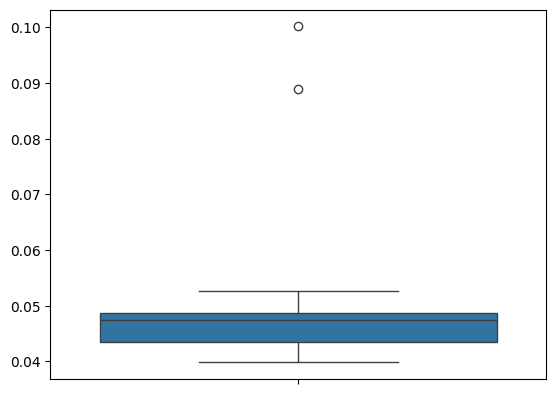

score_time: 0.02980016072591146


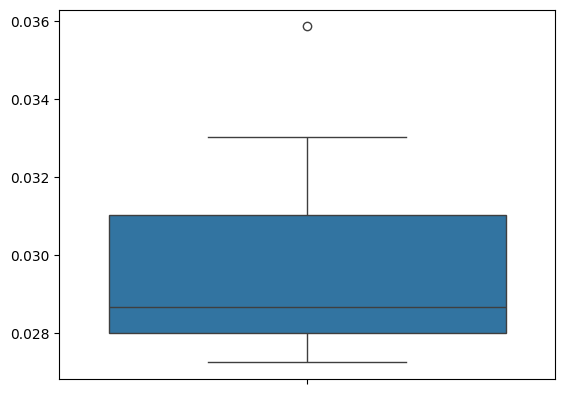

test_accuracy: 0.7196666666666666


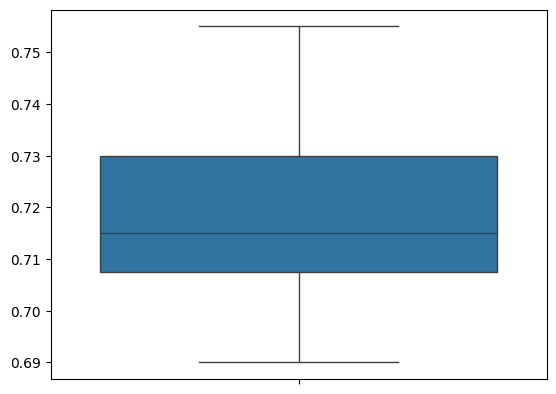

test_recall: 0.698888888888889


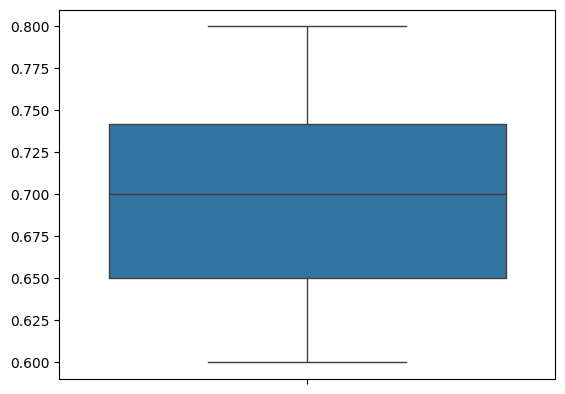

test_gmean: 0.7124273116018788


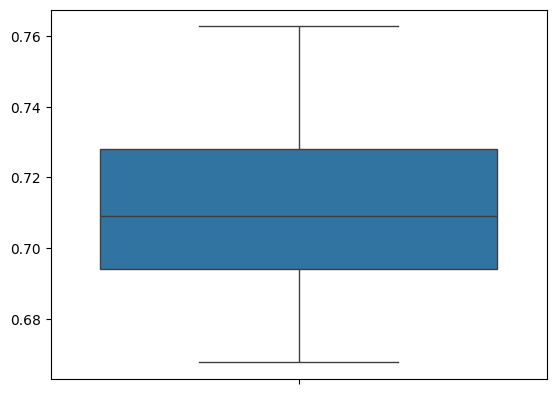

test_precision: 0.5251663453793813


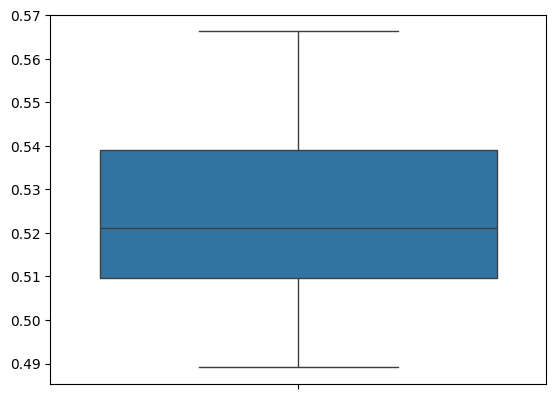

test_f1: 0.5986600055888923


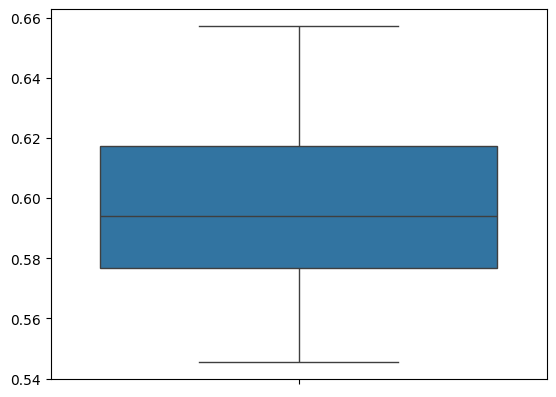

In [59]:
for var, contexto in resultadosOU.items():
    print(f"{var}: {contexto.mean()}")
    ax = sns.boxplot(data=contexto, showmeans=False)
    plt.show()

In [61]:
y_pred = pipe.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78       105
           1       0.51      0.62      0.56        45

    accuracy                           0.71       150
   macro avg       0.67      0.68      0.67       150
weighted avg       0.73      0.71      0.71       150



In [62]:
print(confusion_matrix(y_test, y_pred))

[[78 27]
 [17 28]]


Conclusion es muy dificil sacar todo en 40 min, porque requiero observr que esta pasando, como se entrena y es un proceso iterativo para ajustar las cosas.
no aplique imputacion porque no hay daatos nulos, lo ideal es hot encoding para discretizar categoricas y normalizar numericos para tener todo entre 0-1, vi mas o menos el comportamiento de las numericas y recuerdo que estaba tendido a la izq. por ello es bueno normalizar y  llevar al centro.
Me falto divir datos 50 50 para mejorar las metricas, en general tiene un desempeño decente, mejor para predecir la clase 0 (good) hay que vajar los falso positivos